In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

Vil se på likelihood til sentrert normalfordeling.. hvordan det avhenger av $\sigma$

In [2]:
m = 50
sigma_grid = np.linspace(1,5,m)
x_grid = np.linspace(-6,6,m)

x1,x2 = np.meshgrid(sigma_grid,x_grid)
z = np.empty(m*m)
for i, (sigma,x) in enumerate(zip(x1.flatten(),x2.flatten())):
    z[i] = stats.norm(0,sigma).pdf(x)
z = z.reshape(m,m)

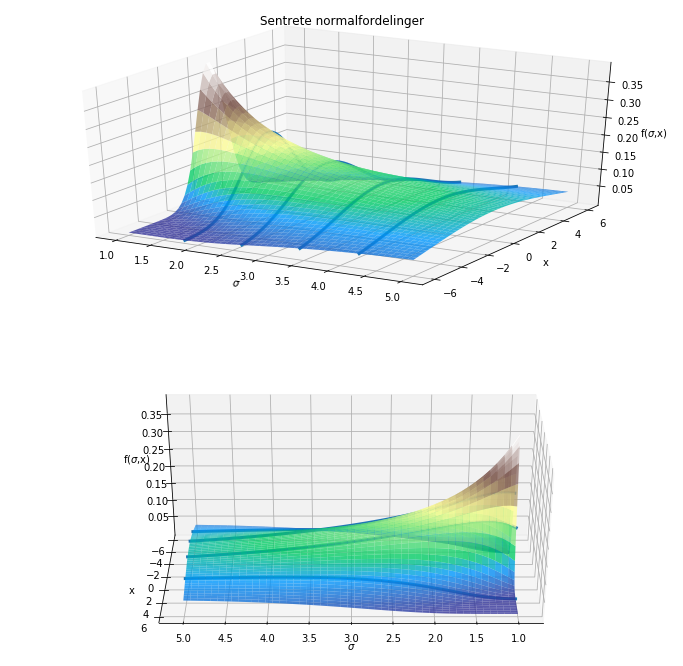

In [3]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(211,projection='3d')
ax.plot_surface(x1,x2,z,cmap='terrain',alpha=0.8)
ax.set(xlabel=r'$\sigma$',ylabel='x')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'f($\sigma$,x)')
for j in (10,20,30,40):
    ax.plot(x1[:,j],x2[:,j],z[:,j],c='tab:blue',lw=3)
ax.set_title('Sentrete normalfordelinger')

ax = fig.add_subplot(212,projection='3d')
ax.plot_surface(x1,x2,z,cmap='terrain',alpha=0.8)
ax.set(xlabel=r'$\sigma$',ylabel='x')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'f($\sigma$,x)')
for j in (10,20,30,40):
    ax.plot(x1[j,:],x2[j,:],z[j,:],c='tab:blue',lw=3)
ax.view_init(None,90)
fig.savefig('normal0.pdf')

In [4]:
m = 50
mu_grid = np.linspace(-4,4,m)
x_grid = np.linspace(-6,6,m)

x1,x2 = np.meshgrid(mu_grid,x_grid)
z = np.empty(m*m)
for i, (mu,x) in enumerate(zip(x1.flatten(),x2.flatten())):
    z[i] = stats.norm(mu,1).pdf(x)
z = z.reshape(m,m)

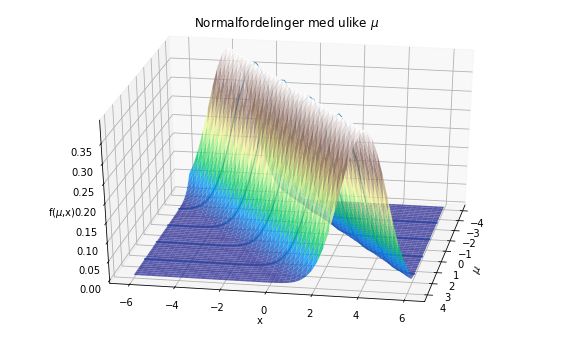

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(x1,x2,z,cmap='terrain',alpha=0.8)
ax.set(xlabel=r'$\mu$',ylabel='x')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'f($\mu$,x)')
for j in (10,20,30,40):
    ax.plot(x1[:,j],x2[:,j],z[:,j],c='tab:blue')
ax.set_title(r'Normalfordelinger med ulike $\mu$')
ax.view_init(azim=10)
fig.savefig('normal1.pdf')

Vil visualisere for bernoulli. Litt vanskeligere fordi det ikke er kontinuerlig... tror jeg kunne gjort det med polygon.

In [6]:
m = 50
p_grid = np.linspace(0,1,m)
x_grid = np.linspace(0,1,m)

x1,x2 = np.meshgrid(p_grid,x_grid)
z = np.empty(m*m)
for i, (p,x) in enumerate(zip(x1.flatten(),x2.flatten())):
    z[i] = stats.bernoulli(p).pmf(x)
z = z.reshape(m,m)

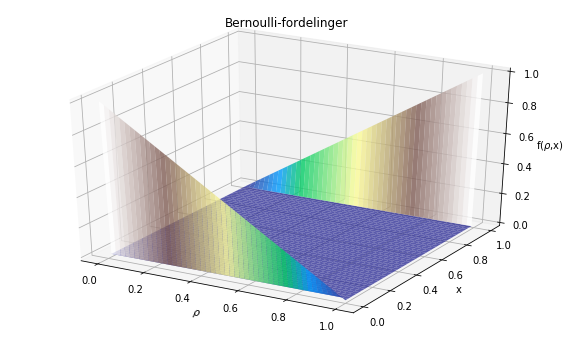

In [7]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(x1,x2,z,cmap='terrain',alpha=0.8)
ax.set(xlabel=r'$\rho$',ylabel='x')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'f($\rho$,x)')
ax.set_title('Bernoulli-fordelinger')
fig.savefig('bernoulli.pdf')

Likelihood er funksjon som avhenger av tilfeldig variabel x. derfor er den også tilfeldig. blir realisert når x blir realiesrt. Utvalget er en gitt realisering. kan bruke dette til å få estimat numerisk. I noen tilfeller kan det også løses analytisk som funksjon av tilfeldig variabel og vi får et generelt uttrykk. Dette er bare i spesialtilfelle. Kan estimere asymptotisk varians selv om det ikke kan løses numerisk.

Antar først at vi sampler fra $N(\mu,1)$, der $\mu_0 = 1$

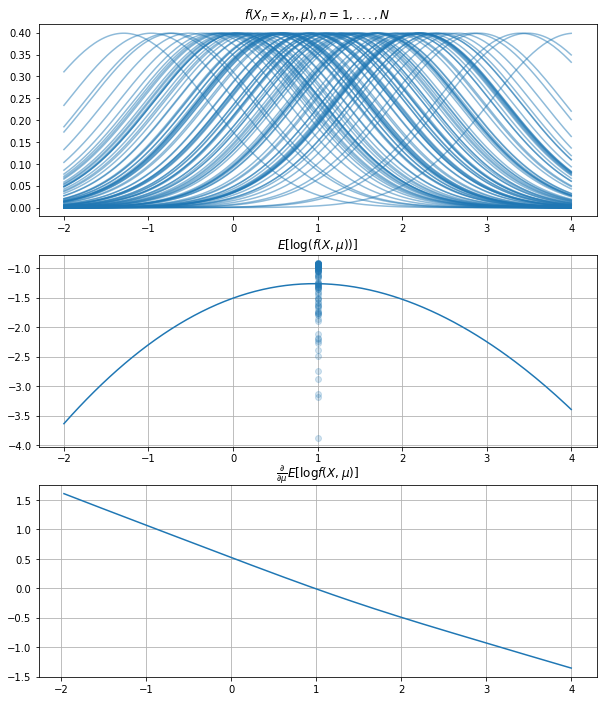

In [17]:
N = 100
m = 200
x = stats.norm(1,1).rvs(N)
fig, (ax0,ax1,ax2) = plt.subplots(3,1,figsize=(10,12))
mu_grid = np.linspace(-2,4,m)
for n in range(N):
    ax0.plot(mu_grid,stats.norm(mu_grid,1).pdf(x[n]),color='tab:blue',alpha=0.5)
ax0.title.set_text(r'$f(X_n=x_n,\mu),n=1,...,N$')


N = 1000
x = stats.norm(1,1).rvs(N)
mu_grid = np.linspace(-2,4,m)
exp_mu_grid = np.empty(m)

N_sub = 100
l0 = np.empty(N_sub)
for i, mu in enumerate(mu_grid):
    exp_mu_grid[i] = sum(stats.norm(mu,1).pdf(x))/N
for n in range(N_sub):
    l0[n] = stats.norm(1,1).pdf(x[n])
l0 = np.log(l0)
exp_mu_grid = np.log(exp_mu_grid)
ax1.plot(mu_grid,exp_mu_grid)
ax1.plot([1]*N_sub,l0,'o',c='tab:blue',alpha=0.2)
ax1.grid()
ax1.title.set_text(r'$E[\log(f(X,\mu))]$')



d_mu = mu_grid[1]-mu_grid[0]
exp_score = np.diff(exp_mu_grid)/d_mu


ax2.plot(mu_grid[1:],exp_score)
ax2.grid()
ax2.title.set_text(r'$\frac{\partial}{\partial \mu}E[\log f(X,\mu)]$')
fig.savefig('likelihood_normal.pdf')

Vil sjekke om jeg kan beregne spredningen numerisk. Kjører først én dimensjon, så ser vi om det er mulig å generalisere.

husker at score er derviert av logartimen til likelihood. forventet score er null evaluert i sann parameter.

fisher info av hvor spiss toppen er, som beskrives med andre-deriverte.. 

fisher info kan defineres som varians av score evauluert i sann parameter.. tror det må være loglikelihood til hele utvalget, men hmm..

$$ I(\theta) = E[score^2|\theta_0]$$

In [9]:
d_mu = 0.01
l_0 = np.log(stats.norm(1,1-d_mu).pdf(x))
l_1 = np.log(stats.norm(1,1).pdf(x))
l_2 = np.log(stats.norm(1,1+d_mu).pdf(x))

scores_0 = (l_1-l_0)/d_mu
scores_1 = (l_2-l_1)/d_mu

f_info = sum(scores_0**2)/N

In [10]:
f_info

2.017060597084591

$$I(\theta) = -E[\frac{\partial}{\partial \theta} score|\theta_0]$$

In [11]:
-sum((scores_1-scores_0)/d_mu)/N

2.0446699662474748

ser ut som de to metodene gir omtrent samme verdi. Skal nå forsøke å bruke dette til å finne asymptotisk varians til estimator a av parameter i normalfordeling.

litt poeng at man kan gjøre det på enkelt observasjon eller på hele utvalg. Dersom prosess er iid er forventing til utvalg bare oppskalering med N ganger forventing til observasjon siden vi bare summenr maassse sjit som er indentiske.

har at 
$$V = I(\theta)^{-1}$$

In [12]:
np.linalg.inv((f_info*100).reshape(1,1))

array([[0.00495771]])

In [13]:
M = 10000
N = 100
x_bars = np.empty(M)
for m in range(M):
    x = stats.norm(1,1).rvs(N)
    x_bars[m] = sum(x)/N

In [14]:
np.std(x_bars)**2

0.010117262250259832

klarte ikke få dette til å fungere, TODO i guess.